## Heston Model

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# Constants
S_0 = 100
kappa = 2
theta = 0.0324
gamma = 0.1
V_0 = 0.0625
rho = -0.7
V_B = 0.0265
n_path = 500
Delta = V_B / n_path
K = 100
r = 0.04
sim_step = 100000



# Function to simulate X paths
def X_path(kappa, theta, Delta, n_path, V_0, gamma):
    X = np.zeros(n_path + 1)
    X[0] = V_0
    for i in range(1, n_path + 1):
        X[i] = X[i - 1] + kappa * theta * Delta / X[i - 1] - kappa * Delta + gamma * np.random.normal(0, np.sqrt(Delta))
    return X

# Function to calculate tau
def tau(X, Delta):
    return np.sum(Delta / X[1:])

# Function to calculate 'a'
def a(kappa, theta, gamma, V_0, rho, V_B, tau_val, V_tau):
    return rho * ((V_tau / gamma) - (V_0 / gamma)) - rho * (kappa * (theta * tau_val - V_B) / gamma) - V_B / 2

# Functions to calculate d1 and d2
def d_1(r, a_val, rho, V_B, S_0, K, tau_val):
    return (np.log(S_0 / K) + r * tau_val + a_val + (1 - rho ** 2) * V_B) / np.sqrt((1 - rho ** 2) * V_B)

def d_2(d_1_val, rho, V_B):
    return d_1_val - np.sqrt((1 - rho ** 2) * V_B)

# Function to calculate the call option price
def C_mc(S_0, rho, V_B, a_val, d_1_val, K, r, d_2_val, tau_val):
    return S_0 * np.exp((1 - rho ** 2) * V_B / 2) * np.exp(a_val) * norm.cdf(d_1_val) - K * np.exp(-r * tau_val) * norm.cdf(d_2_val)

# Simulation
C = np.zeros(sim_step)
for i in range(sim_step):
    X = X_path(kappa, theta, Delta, n_path, V_0, gamma)
    tau_val = tau(X, Delta)
    V_tau = X[-1]
    a_val = a(kappa, theta, gamma, V_0, rho, V_B, tau_val, V_tau)
    d_1_val = d_1(r, a_val, rho, V_B, S_0, K, tau_val)
    d_2_val = d_2(d_1_val, rho, V_B)
    C[i] = C_mc(S_0, rho, V_B, a_val, d_1_val, K, r, d_2_val, tau_val)



print(np.mean(C))

7.576028949065773


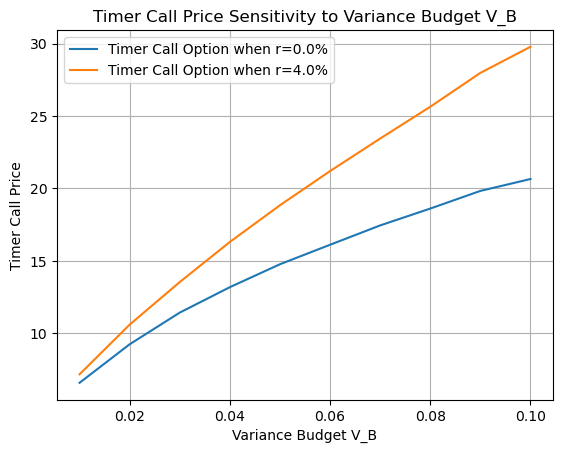

In [107]:
def single_simulation(r, V_B):
    # Adjust Delta for each V_B
    Delta = V_B / n_path
    C = []
    for _ in range(sim_step):
        # Simulate the paths and calculate the price
        X = X_path(kappa, theta, Delta, n_path, V_0, gamma)
        tau_val = tau(X, Delta)
        V_tau = X[-1]
        a_val = a(kappa, theta, gamma, V_0, rho, V_B, tau_val, V_tau)
        d_1_val = d_1(r, a_val, rho, V_B, S_0, K, tau_val)
        d_2_val = d_2(d_1_val, rho, V_B)
        C.append(C_mc(S_0, rho, V_B, a_val, d_1_val, K, r, d_2_val, tau_val))
    return np.mean(C)

# List of risk-free rates to analyze
risk_free_rates = [0.0, 0.04]

# Utilize all available cores for parallel processing
num_cores = multiprocessing.cpu_count()

# Perform simulations in parallel for each risk-free rate
results = {r: Parallel(n_jobs=num_cores)(delayed(single_simulation)(r, V_B) for V_B in V_B_range)
           for r in risk_free_rates}

# Plot the results for each risk-free rate
for r, prices in results.items():
    plt.plot(V_B_range, prices, label=f'Timer Call Option when r={r*100}%')

plt.xlabel('Variance Budget V_B')
plt.ylabel('Timer Call Price')
plt.title('Timer Call Price Sensitivity to Variance Budget V_B')
plt.legend()
plt.grid(True)
plt.show()

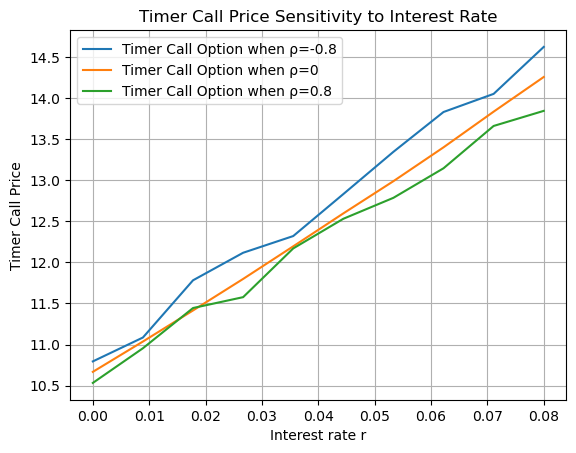

In [110]:
def single_simulation(r, V_B):
    # Adjust Delta for each V_B
    Delta = V_B / n_path
    C = []
    for _ in range(sim_step):
        # Simulate the paths and calculate the price
        X = X_path(kappa, theta, Delta, n_path, V_0, gamma)
        tau_val = tau(X, Delta)
        V_tau = X[-1]
        a_val = a(kappa, theta, gamma, V_0, rho, V_B, tau_val, V_tau)
        d_1_val = d_1(r, a_val, rho, V_B, S_0, K, tau_val)
        d_2_val = d_2(d_1_val, rho, V_B)
        C.append(C_mc(S_0, rho, V_B, a_val, d_1_val, K, r, d_2_val, tau_val))
    return np.mean(C)

# List of risk-free rates to analyze
risk_free_rates = [0.0, 0.04]

# Utilize all available cores for parallel processing
num_cores = multiprocessing.cpu_count()

# Perform simulations in parallel for each risk-free rate
results = {r: Parallel(n_jobs=num_cores)(delayed(single_simulation)(r, V_B) for V_B in V_B_range)
           for r in risk_free_rates}

# Plot the results for each risk-free rate
for r, prices in results.items():
    plt.plot(V_B_range, prices, label=f'Timer Call Option when r={r*100}%')

plt.xlabel('Variance Budget V_B')
plt.ylabel('Timer Call Price')
plt.title('Timer Call Price Sensitivity to Variance Budget V_B')
plt.legend()
plt.grid(True)
plt.show()import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
# ... (as before)

# Define a function to run Monte Carlo simulation for a given r and ρ
def monte_carlo_simulation(r, rho, V_B, sim_step, kappa, theta, gamma, V_0, S_0, K, n_path):
    prices = []
    for _ in range(sim_step):
        X = X_path(kappa, theta, V_B/n_path, n_path, V_0, gamma)
        tau_val = tau(X, V_B/n_path)
        V_tau = X[-1]
        a_val = a(kappa, theta, gamma, V_0, rho, V_B, tau_val, V_tau)
        d_1_val = d_1(r, a_val, rho, V_B, S_0, K, tau_val)
        d_2_val = d_2(d_1_val, rho, V_B)
        price = C_mc(S_0, rho, V_B, a_val, d_1_val, K, r, d_2_val, tau_val)
        prices.append(price)
    return np.mean(prices)

# Define risk-free rates and correlation coefficients to analyze
risk_free_rates = np.linspace(0, 0.08, 10)  # You can adjust the number of points for better resolution
correlations = [-0.8, 0, 0.8]
V_B = 0.0265  # Base variance budget
sim_step = 10000  # Number of simulations, increase for more accuracy

# Dictionary to hold results
price_sensitivity = {rho: [] for rho in correlations}

# Run Monte Carlo simulations
for rho in correlations:
    for r in risk_free_rates:
        price = monte_carlo_simulation(r, rho, V_B, sim_step, kappa, theta, gamma, V_0, S_0, K, n_path)
        price_sensitivity[rho].append(price)

# Plot the results
for rho, prices in price_sensitivity.items():
    plt.plot(risk_free_rates, prices, label=f'Timer Call Option when ρ={rho}')

plt.xlabel('Interest rate r')
plt.ylabel('Timer Call Price')
plt.title('Timer Call Price Sensitivity to Interest Rate')
plt.legend()
plt.grid(True)
plt.show()


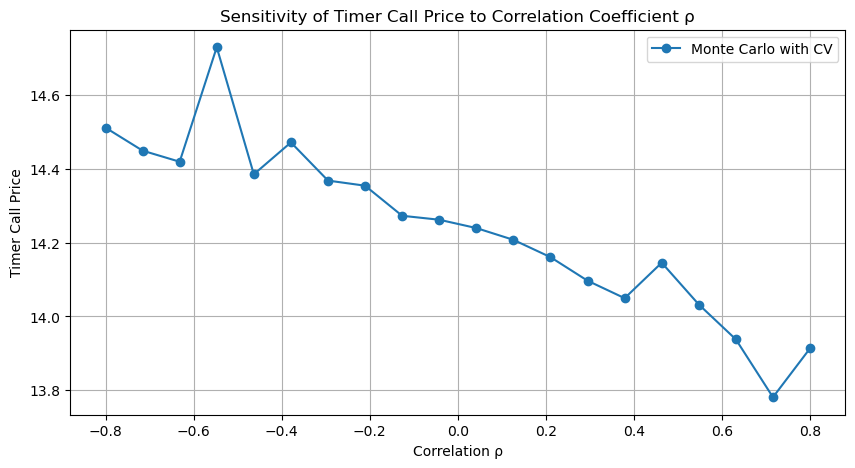

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants are defined here as in your snippet...

# Adjust these constants as per your scenario
sim_step = 10000 # Adjust as needed for full simulation
correlation_values = np.linspace(-0.8, 0.8, 20)  # Range of correlation values to test

# Monte Carlo simulation function (as you defined)
# ... (remains the same)

# Calculate the prices for different values of ρ
timer_call_prices = []
for rho in correlation_values:
    price = monte_carlo_simulation(kappa, theta, gamma, V_0, rho, V_B, S_0, K, r, n_path, sim_step)
    timer_call_prices.append(price)

# Assuming black_scholes_price is calculated elsewhere and is a single value
# If not, calculate or set it here as a constant based on the details provided in your figure description
#black_scholes_price = ...  # Replace with actual Black-Scholes calculation

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(correlation_values, timer_call_prices, label='Monte Carlo with CV', marker='o')
#plt.axhline(y=black_scholes_price, color='b', linestyle='--', label='Black Scholes')
plt.xlabel('Correlation ρ')
plt.ylabel('Timer Call Price')
plt.title('Sensitivity of Timer Call Price to Correlation Coefficient ρ')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
def approximate_delta(S_0, K, r, tau_val, a_val, V_B, rho, dS=0.01):
    # Calculate the option price for an increase in stock price
    S_up = S_0 + dS
    d_1_val_up = d_1(r, a_val, rho, V_B, S_up, K, tau_val)
    d_2_val_up = d_2(d_1_val_up, rho, V_B)
    option_price_up = C_mc(S_up, rho, V_B, a_val, d_1_val_up, K, r, d_2_val_up, tau_val)
    
    # Calculate the option price for a decrease in stock price
    S_down = S_0 - dS
    d_1_val_down = d_1(r, a_val, rho, V_B, S_down, K, tau_val)
    d_2_val_down = d_2(d_1_val_down, rho, V_B)
    option_price_down = C_mc(S_down, rho, V_B, a_val, d_1_val_down, K, r, d_2_val_down, tau_val)
    
    # Approximate the delta
    delta_approx = (option_price_up - option_price_down) / (2 * dS)
    return delta_approx

# You will need to ensure that the variables tau_val and a_val have been properly defined before this call.
# Use the current stock price for S_0 to approximate the delta
delta = approximate_delta(S_0, K, r, tau_val, a_val, V_B, rho)

print(delta)


0.39577775883330446


In [3]:
import yfinance as yf
import numpy as np

# Fetch data
aapl_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31', progress=False)
aapl_data = aapl_data['Close']

# Display the last price (most recent closing price)
print("Latest AAPL closing price:", aapl_data[-1])
# Calculate daily returns
daily_returns = np.log(aapl_data / aapl_data.shift(1))

# Calculate annualized volatility
annual_volatility = np.std(daily_returns) * np.sqrt(252)
print("Annualized Volatility:", annual_volatility)

# Calculate annualized average return
annual_average_return = np.mean(daily_returns) * 252
print("Annualized Average Return:", annual_average_return)

Latest AAPL closing price: 192.52999877929688
Annualized Volatility: 0.19875411800170198
Annualized Average Return: 0.4365757314160466


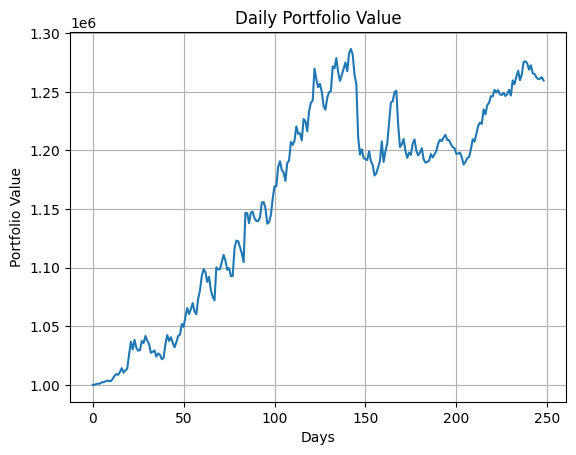

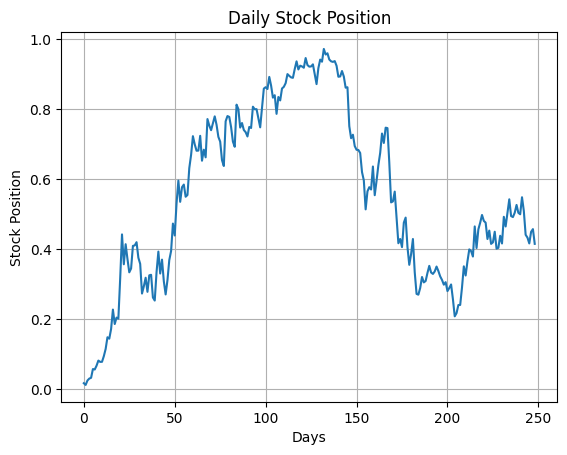

,option_delta,stock_position,option_value,portfolio_value
0,0.016036,0.016036,0.080842,1.000165e+06
1,0.011122,0.011122,0.053323,1.000047e+06
2,0.023767,0.023767,0.128927,1.000922e+06
3,0.029171,0.029171,0.163004,1.001041e+06
4,0.031538,0.031538,0.178877,1.001182e+06
...,...,...,...,...
244,0.432066,0.432066,7.186520,1.262321e+06
245,0.415404,0.415404,6.757688,1.260852e+06
246,0.448494,0.448494,7.566615,1.261165e+06
247,0.456320,0.456320,7.789201,1.262468e+06


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import copy

stock_price = copy.deepcopy(aapl_data)


# Initialize variables
hedge_ratio = 0  # or some initial delta if you have it
shares_held = 0  # Initial number of shares held
cash = 1000000  # Initial c

S_0 = stock_price[0]
kappa = 2
theta = 0.0324
gamma = 0.1
V_0 = annual_volatility ** 2
rho = -0.7
V_B = 0.0265
n_path = 500
Delta = V_B / n_path
K = np.mean(stock_price)
r = 0.03
sim_step = 1000


# Initialize your variance path X
X = X_path(kappa, theta, Delta, n_path, V_0, gamma)

# Initialize daily positions dictionary
daily_positions ={'option_delta': [], 'stock_position': [], 'option_value': [], 'portfolio_value': []}

# Run the simulation
for i in range(1, len(stock_price)):
    # Update tau and a_val for each step
    tau_val = tau(X[i:], Delta)
    a_val = a(kappa, theta, gamma, V_0, rho, V_B, tau_val, X[i])
    
    # Update option value and deltas based on new stock price
    d_1_val = d_1(r, a_val, rho, V_B, stock_price[i], K, tau_val)
    d_2_val = d_2(d_1_val, rho, V_B)
    option_value = C_mc(stock_price[i], rho, V_B, a_val, d_1_val, K, r, d_2_val, tau_val)
    
    new_delta = approximate_delta(stock_price[i], K, r, tau_val, a_val, V_B, rho)
    
    # Calculate the change in stock position
    #d_shares = (new_delta - hedge_ratio) * 1  # Change in delta times number of options hedged
    
    # Adjust stock positions to achieve desired hedge ratio
    stock_change = new_delta - hedge_ratio
    shares_held += stock_change

    # Update hedge ratio for next iteration
    hedge_ratio = new_delta

    
     # Log daily positions
    daily_positions['option_delta'].append(new_delta)
    daily_positions['stock_position'].append(shares_held)
    daily_positions['option_value'].append(option_value)
    if i ==0 :
        daily_positions['portfolio_value'].append(cash)
    else:
        daily_positions['portfolio_value'].append(cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0))
        new_cash = cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0)
        cash = new_cash

# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['portfolio_value'].plot()
plt.title('Daily Portfolio Value')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid()
plt.show()

# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['stock_position'].plot()
plt.title('Daily Stock Position')
plt.xlabel('Days')
plt.ylabel('Stock Position')
plt.grid()
plt.show()

df_positions

In [5]:
portfolio_values = list(df_positions['portfolio_value'])

In [6]:
# Convert portfolio values to daily returns
daily_returns = np.array(portfolio_values[1:]) / np.array(portfolio_values[:-1]) - 1

# Cumulative return
cumulative_return = portfolio_values[-1] / portfolio_values[0] - 1

# Volatility (annualized)
volatility = np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year

# Sharpe ratio (assuming risk-free rate is 0 for simplicity)
risk_free_rate = 0.00  # You can replace this with the current risk-free rate
sharpe_ratio = (np.mean(daily_returns) - risk_free_rate) / np.std(daily_returns) * np.sqrt(252)

# Maximum drawdown
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)  # Maximum drawdown

print(f'Cumulative return: {cumulative_return:.2%}')
print(f'Annual volatility: {volatility:.2%}')
print(f'Sharpe ratio: {sharpe_ratio:.2f}')
print(f'Maximum drawdown: {max_drawdown:.2%}')

Cumulative return: 25.94%
Annual volatility: 11.49%
Sharpe ratio: 2.10
Maximum drawdown: -8.39%


In [3]:
import yfinance as yf
import numpy as np

# Fetch data
jpm_data = yf.download('JPM', start='2023-01-01', end='2023-12-31', progress=False)
jpm_data = jpm_data['Close']

# Display the last price (most recent closing price)
print("Latest AAPL closing price:", jpm_data[-1])
# Calculate daily returns
daily_returns = np.log(jpm_data / jpm_data.shift(1))

# Calculate annualized volatility
annual_volatility = np.std(daily_returns) * np.sqrt(252)
print("Annualized Volatility:", annual_volatility)

# Calculate annualized average return
annual_average_return = np.mean(daily_returns) * 252
print("Annualized Average Return:", annual_average_return)

Latest AAPL closing price: 170.10000610351562
Annualized Volatility: 0.20782571778698825
Annualized Average Return: 0.2329970736068533


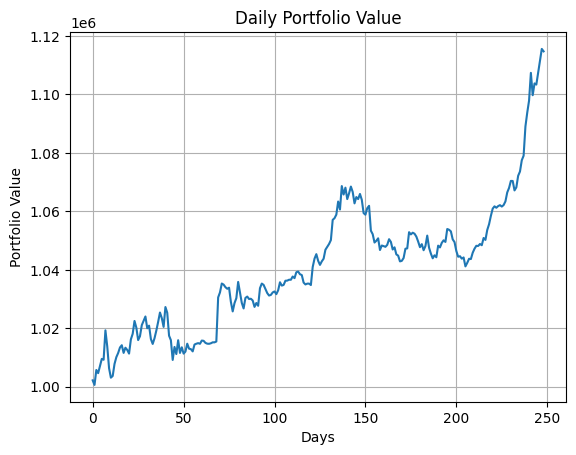

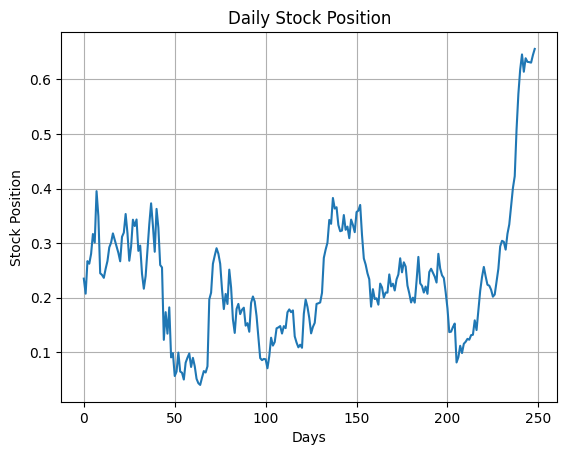

,option_delta,stock_position,option_value,portfolio_value
0,0.235013,0.235013,2.094151,1.002192e+06
1,0.207415,0.207415,1.770194,1.000622e+06
2,0.267017,0.267017,2.504860,1.005734e+06
3,0.262362,0.262362,2.435205,1.004644e+06
4,0.280482,0.280482,2.687445,1.007167e+06
...,...,...,...,...
244,0.632301,0.632301,11.592326,1.103382e+06
245,0.631829,0.631829,11.696728,1.107529e+06
246,0.630901,0.630901,11.789166,1.111745e+06
247,0.644786,0.644786,12.367832,1.115580e+06


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import copy

stock_price = copy.deepcopy(jpm_data)


# Initialize variables
hedge_ratio = 0  # or some initial delta if you have it
shares_held = 0  # Initial number of shares held
cash = 1000000  # Initial c

S_0 = stock_price[0]
kappa = 2
theta = 0.0324
gamma = 0.1
V_0 = annual_volatility ** 2
rho = -0.7
V_B = 0.0265
n_path = 500
Delta = V_B / n_path
K = np.mean(stock_price)
r = 0.03
sim_step = 1000


# Initialize your variance path X
X = X_path(kappa, theta, Delta, n_path, V_0, gamma)

# Initialize daily positions dictionary
daily_positions ={'option_delta': [], 'stock_position': [], 'option_value': [], 'portfolio_value': []}

# Run the simulation
for i in range(1, len(stock_price)):
    # Update tau and a_val for each step
    tau_val = tau(X[i:], Delta)
    a_val = a(kappa, theta, gamma, V_0, rho, V_B, tau_val, X[i])
    
    # Update option value and deltas based on new stock price
    d_1_val = d_1(r, a_val, rho, V_B, stock_price[i], K, tau_val)
    d_2_val = d_2(d_1_val, rho, V_B)
    option_value = C_mc(stock_price[i], rho, V_B, a_val, d_1_val, K, r, d_2_val, tau_val)
    
    new_delta = approximate_delta(stock_price[i], K, r, tau_val, a_val, V_B, rho)
    
    # Calculate the change in stock position
    #d_shares = (new_delta - hedge_ratio) * 1  # Change in delta times number of options hedged
    
    # Adjust stock positions to achieve desired hedge ratio
    stock_change = new_delta - hedge_ratio
    shares_held += stock_change

    # Update hedge ratio for next iteration
    hedge_ratio = new_delta

    
     # Log daily positions
    daily_positions['option_delta'].append(new_delta)
    daily_positions['stock_position'].append(shares_held)
    daily_positions['option_value'].append(option_value)
    if i ==0 :
        daily_positions['portfolio_value'].append(cash)
    else:
        daily_positions['portfolio_value'].append(cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0))
        new_cash = cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0)
        cash = new_cash

# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['portfolio_value'].plot()
plt.title('Daily Portfolio Value')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid()
plt.show()

# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['stock_position'].plot()
plt.title('Daily Stock Position')
plt.xlabel('Days')
plt.ylabel('Stock Position')
plt.grid()
plt.show()

df_positions

In [5]:
portfolio_values = list(df_positions['portfolio_value'])

In [6]:
# Convert portfolio values to daily returns
daily_returns = np.array(portfolio_values[1:]) / np.array(portfolio_values[:-1]) - 1

# Cumulative return
cumulative_return = portfolio_values[-1] / portfolio_values[0] - 1

# Volatility (annualized)
volatility = np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year

# Sharpe ratio (assuming risk-free rate is 0 for simplicity)
risk_free_rate = 0.00  # You can replace this with the current risk-free rate
sharpe_ratio = (np.mean(daily_returns) - risk_free_rate) / np.std(daily_returns) * np.sqrt(252)

# Maximum drawdown
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)  # Maximum drawdown

print(f'Cumulative return: {cumulative_return:.2%}')
print(f'Annual volatility: {volatility:.2%}')
print(f'Sharpe ratio: {sharpe_ratio:.2f}')
print(f'Maximum drawdown: {max_drawdown:.2%}')

Cumulative return: 11.23%
Annual volatility: 4.51%
Sharpe ratio: 2.42
Maximum drawdown: -2.57%


## Hull-White Model

In [4]:
import numpy as np
from math import exp, sqrt
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Parameters (example values, you will need to replace these with actual data)
S0 = 100  # Current AAPL stock price
K = 100      # Strike price
r = 0    # Risk-free rate
V0 = 0.0625    # Initial variance
rho = 0  # Correlation between the stock and variance
# mu = annual_average_return # drift
# variance_bound = 0.0265 * np.sqrt(252)
variance_bound = 0.0265
a = 0.2
v = 0.1
X0 = (2/v) * np.sqrt(V0)  # transformation of V0
n_steps = 50  # Number of time steps
option_type = 'call'  # 'call' or 'put'
num_simulations = 10000

# Time step
dt = variance_bound / n_steps

import numpy as np
from scipy.stats import norm

def price_timer_call_option(S0, K, r, V0, rho, H_tau, tau, V_tau, variance_bound):
    # Calculating a_tau
    a_tau = (2 * rho / v) * (np.sqrt(V_tau) - np.sqrt(V0)) - rho * H_tau - 0.5 * variance_bound
    
    # Calculating d1 and d2
    d1 = (np.log(S0 / K) + r * tau + a_tau + (1 - (rho ** 2)) * variance_bound) / np.sqrt((1 - (rho ** 2)) * variance_bound)
    d2 = d1 - np.sqrt((1 - (rho ** 2)) * variance_bound)

    # Calculating the call option price
    C0 = S0 * exp(a_tau + ((1- (rho ** 2)) * variance_bound)/2 )  * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    return C0

# Function to simulate Yt (transformed Vt) using the forward Euler method
def simulate_Xt(X0, v, dt, n_steps):
    Xt = np.zeros(n_steps)
    Xt[0] = X0
    for t in range(1, n_steps):
        dBt = np.sqrt(dt) * np.random.normal(0, np.sqrt(dt))  # Standard Normal Brownian increment
        Xt[t] = ((2*a/(v**2)) - (1/2)) * (1 / Xt[t - 1]) * dt + dBt
    return Xt

# Price the option
option_price = np.zeros(num_simulations)
for i in range(num_simulations):
    # Simulate Xt
    Xt = simulate_Xt(X0, v, dt, n_steps)
    X_variance_bound = Xt[-1]
    tau = (4/(v**2)) * simps(1/(Xt**2), dx=dt)
    V_tau = (1/4) * (v**2) * (X_variance_bound**2)
    H_tau = ((2*a/(v**2)) - (1/2)) * simps(1/Xt, dx=dt)
    option_price[i] = price_timer_call_option(S0, K, r, V0, rho, H_tau, tau, V_tau, variance_bound)

print(option_price)
print(f"The price of the timer call option is: {np.mean(option_price)}")

[6.48714613 6.48714613 6.48714613 ... 6.48714613 6.48714613 6.48714613]
The price of the timer call option is: 6.487146130804007


## Sentiment Analysis (Variance Budget)

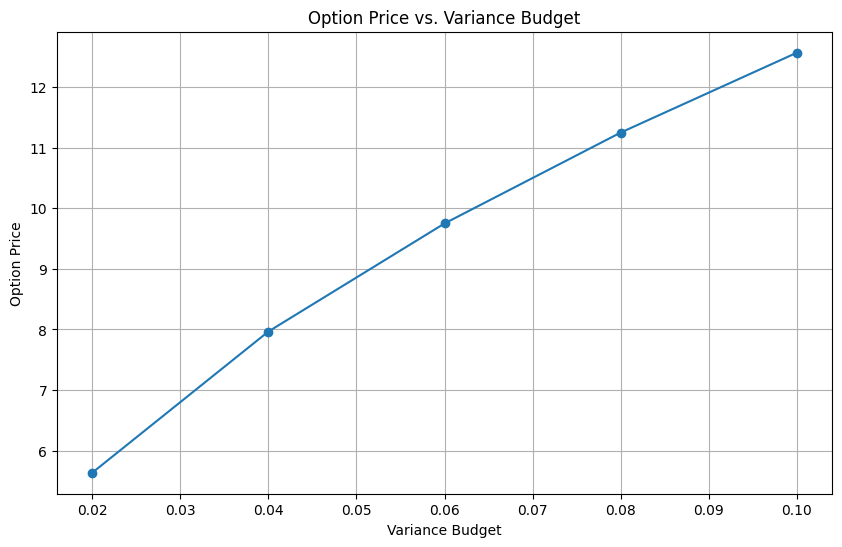

In [2]:
# Variance bounds
variance_bounds = np.array([0.02, 0.04, 0.06, 0.08, 0.1])
option_prices = []

for variance_bound in variance_bounds:
    dt = variance_bound / n_steps
    option_price = np.zeros(num_simulations)
    for i in range(num_simulations):
        Xt = simulate_Xt(X0, v, dt, n_steps)
        X_variance_bound = Xt[-1]
        tau = (4/(v**2)) * simps(1/(Xt**2), dx=dt)
        V_tau = (1/4) * (v**2) * (X_variance_bound**2)
        H_tau = ((2*a/(v**2)) - (1/2)) * simps(1/Xt, dx=dt)
        option_price[i] = price_timer_call_option(S0, K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    option_prices.append(np.mean(option_price))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(variance_bounds, option_prices, marker='o', linestyle='-')
plt.xlabel('Variance Budget')
plt.ylabel('Option Price')
plt.title('Option Price vs. Variance Budget')
plt.grid(True)
plt.show()

## Sentiment Analysis (interest rate r)

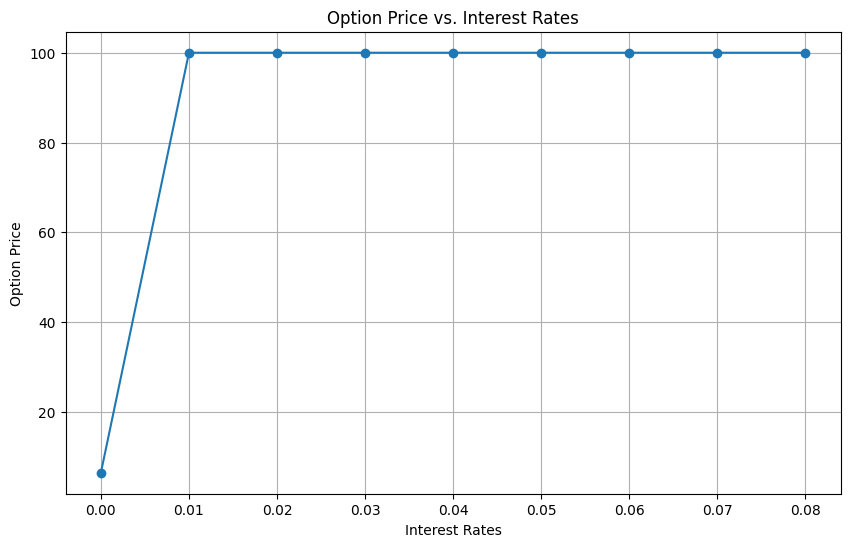

In [2]:
# Variance bounds
interest_rates = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
option_prices = []

for r in interest_rates:
    dt = variance_bound / n_steps
    option_price = np.zeros(num_simulations)
    for i in range(num_simulations):
        Xt = simulate_Xt(X0, v, dt, n_steps)
        X_variance_bound = Xt[-1]
        tau = (4/(v**2)) * simps(1/(Xt**2), dx=dt)
        V_tau = (1/4) * (v**2) * (X_variance_bound**2)
        H_tau = ((2*a/(v**2)) - (1/2)) * simps(1/Xt, dx=dt)
        option_price[i] = price_timer_call_option(S0, K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    option_prices.append(np.mean(option_price))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(interest_rates, option_prices, marker='o', linestyle='-')
plt.xlabel('Interest Rates')
plt.ylabel('Option Price')
plt.title('Option Price vs. Interest Rates')
plt.grid(True)
plt.show()

## Dynamic Hedging

In [5]:
import yfinance as yf
import numpy as np

# Fetch data
aapl_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31', progress=False)
aapl_data = aapl_data['Close']

# Display the last price (most recent closing price)
print("Latest AAPL closing price:", aapl_data[-1])
# Calculate daily returns
daily_returns = np.log(aapl_data / aapl_data.shift(1))

# Calculate annualized volatility
annual_volatility = np.std(daily_returns) * np.sqrt(252)
print("Annualized Volatility:", annual_volatility)

# Calculate annualized average return
annual_average_return = np.mean(daily_returns) * 252
print("Annualized Average Return:", annual_average_return)

Latest AAPL closing price: 192.52999877929688
Annualized Volatility: 0.19875411800170198
Annualized Average Return: 0.4365757314160466


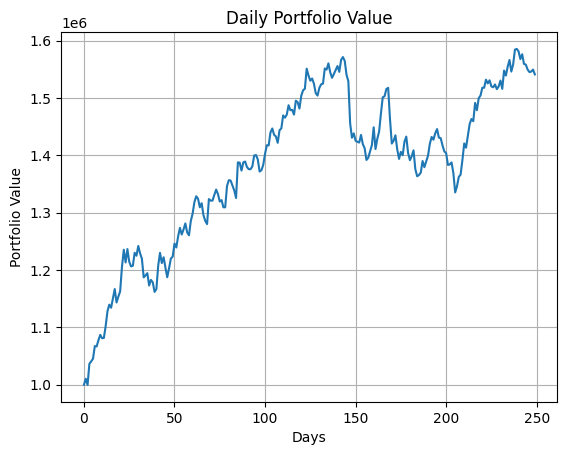

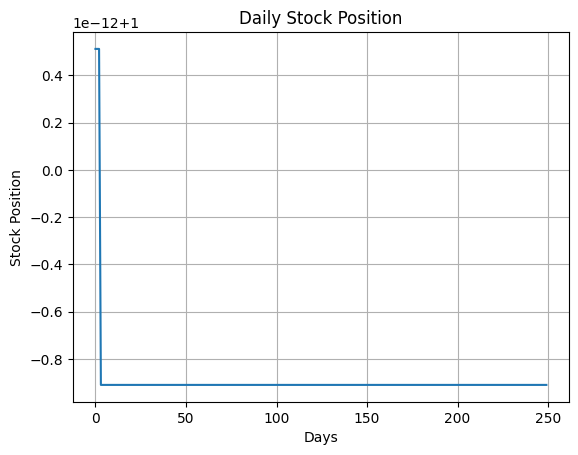

,option_delta,stock_position,option_value,portfolio_value
0,1.0,1.0,125.070000,1.000000e+06
1,1.0,1.0,126.360001,1.010314e+06
2,1.0,1.0,125.019997,9.996002e+05
3,1.0,1.0,129.619995,1.036380e+06
4,1.0,1.0,130.149994,1.040617e+06
...,...,...,...,...
245,1.0,1.0,193.600006,1.549630e+06
246,1.0,1.0,193.050003,1.545248e+06
247,1.0,1.0,193.149994,1.546069e+06
248,1.0,1.0,193.580002,1.549532e+06


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

stock_price = copy.deepcopy(aapl_data)

# Parameters
S0 = stock_price[0]  # Current AAPL stock price
K = np.mean(stock_price)      # Strike price
r = 0.03    # Risk-free rate
V0 = annual_volatility ** 2    # Initial variance
rho = 0  # Correlation between the stock and variance
variance_bound = 0.0265
a = 0.2
v = 0.1
X0 = (2/v) * np.sqrt(V0)  # transformation of V0
n_steps = 252  # Number of time steps
option_type = 'call'  # 'call' or 'put'
dt = variance_bound / n_steps
num_simulations = 1

# Initialize necessary variables
shares_held = 0
cash = 1000000  # Initialize with your initial cash position if available
hedge_ratio = 0  # Initial hedge ratio

def approximate_delta(S0, K, r, V0, rho, H_tau, tau, V_tau, variance_bound):
    dS = 0.01
    S_up = S0 + dS
    S_down = S0 - dS
    option_price_up = price_timer_call_option(S_up, K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    option_price_down = price_timer_call_option(S_down, K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    delta_approx = (option_price_up - option_price_down) / (2 * dS)
    return delta_approx

daily_positions = {'option_delta': [], 'stock_position': [], 'option_value': [], 'portfolio_value': []}

# Main loop
for i in range(len(stock_price)):
    
    # Price the option
    option_price = np.zeros(num_simulations)
    for j in range(num_simulations):
        # Simulate Xt
        Xt = simulate_Xt(X0, v, dt, n_steps)
        X_variance_bound = Xt[-1]
        tau = (4/(v**2)) * simps(1/(Xt**2), dx=dt)
        V_tau = (1/4) * (v**2) * (X_variance_bound**2)
        H_tau = ((2*a/(v**2)) - (1/2)) * simps(1/Xt, dx=dt)
        option_price[j] = price_timer_call_option(stock_price[i], K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    
    option_value = np.mean(option_price)
    new_delta = approximate_delta(stock_price[i], K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    
    # Adjust stock positions to achieve desired hedge ratio
    stock_change = new_delta - hedge_ratio
    shares_held += stock_change

    # Update hedge ratio for next iteration
    hedge_ratio = new_delta

    # Log daily positions
    daily_positions['option_delta'].append(new_delta)
    daily_positions['stock_position'].append(shares_held)
    daily_positions['option_value'].append(option_value)
    if i ==0 :
        daily_positions['portfolio_value'].append(cash)
    else:
        daily_positions['portfolio_value'].append(cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0))
        new_cash = cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0)
        cash = new_cash
# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['portfolio_value'].plot()
plt.title('Daily Portfolio Value')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid()
plt.show()

# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['stock_position'].plot()
plt.title('Daily Stock Position')
plt.xlabel('Days')
plt.ylabel('Stock Position')
plt.grid()
plt.show()

df_positions

In [26]:
portfolio_values = list(aapl_data)

In [27]:
# Convert portfolio values to daily returns
daily_returns = np.array(portfolio_values[1:]) / np.array(portfolio_values[:-1]) - 1

# Cumulative return
cumulative_return = portfolio_values[-1] / portfolio_values[0] - 1

# Volatility (annualized)
volatility = np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year

# Sharpe ratio (assuming risk-free rate is 0 for simplicity)
risk_free_rate = 0.00  # You can replace this with the current risk-free rate
sharpe_ratio = (np.mean(daily_returns) - risk_free_rate) / np.std(daily_returns) * np.sqrt(252)

# Maximum drawdown
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)  # Maximum drawdown

print(f'Cumulative return: {cumulative_return:.2%}')
print(f'Annual volatility: {volatility:.2%}')
print(f'Sharpe ratio: {sharpe_ratio:.2f}')
print(f'Maximum drawdown: {max_drawdown:.2%}')

Cumulative return: 53.94%
Annual volatility: 19.91%
Sharpe ratio: 2.29
Maximum drawdown: -15.05%


In [22]:
import yfinance as yf
import numpy as np

# Fetch data
jpm_data = yf.download('JPM', start='2023-01-01', end='2023-12-31', progress=False)
jpm_data = jpm_data['Close']

# Display the last price (most recent closing price)
print("Latest AAPL closing price:", jpm_data[-1])
# Calculate daily returns
daily_returns = np.log(jpm_data / jpm_data.shift(1))

# Calculate annualized volatility
annual_volatility = np.std(daily_returns) * np.sqrt(252)
print("Annualized Volatility:", annual_volatility)

# Calculate annualized average return
annual_average_return = np.mean(daily_returns) * 252
print("Annualized Average Return:", annual_average_return)

Latest AAPL closing price: 170.10000610351562
Annualized Volatility: 0.20782571778698825
Annualized Average Return: 0.2329970736068533


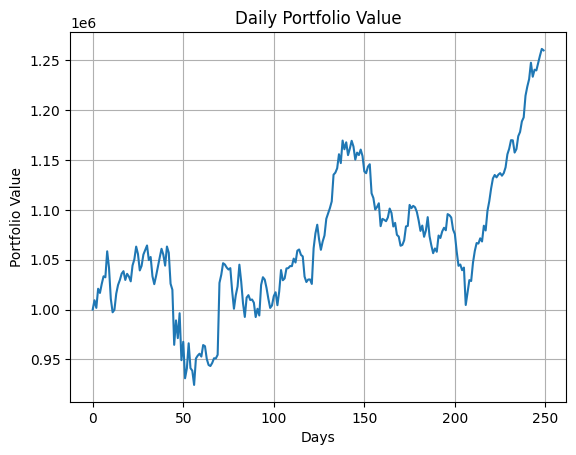

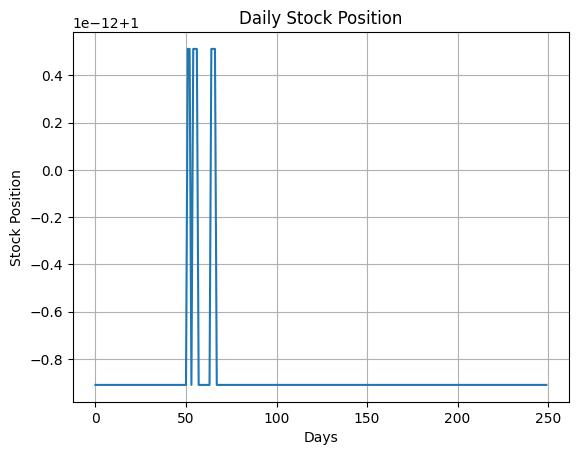

,option_delta,stock_position,option_value,portfolio_value
0,1.0,1.0,135.119995,1.000000e+06
1,1.0,1.0,136.380005,1.009325e+06
2,1.0,1.0,135.350006,1.001702e+06
3,1.0,1.0,137.940002,1.020870e+06
4,1.0,1.0,137.369995,1.016652e+06
...,...,...,...,...
245,1.0,1.0,167.399994,1.239742e+06
246,1.0,1.0,168.389999,1.247098e+06
247,1.0,1.0,169.399994,1.254604e+06
248,1.0,1.0,170.300003,1.261296e+06


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

stock_price = copy.deepcopy(jpm_data)

# Parameters
S0 = stock_price[0]  # Current AAPL stock price
K = np.mean(stock_price)      # Strike price
r = 0.03    # Risk-free rate
V0 = annual_volatility ** 2    # Initial variance
rho = 0  # Correlation between the stock and variance
variance_bound = 0.0265
a = 0.2
v = 0.1
X0 = (2/v) * np.sqrt(V0)  # transformation of V0
n_steps = 252  # Number of time steps
option_type = 'call'  # 'call' or 'put'
dt = variance_bound / n_steps
num_simulations = 1

# Initialize necessary variables
shares_held = 0
cash = 1000000  # Initialize with your initial cash position if available
hedge_ratio = 0  # Initial hedge ratio

def approximate_delta(S0, K, r, V0, rho, H_tau, tau, V_tau, variance_bound):
    dS = 0.01
    S_up = S0 + dS
    S_down = S0 - dS
    option_price_up = price_timer_call_option(S_up, K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    option_price_down = price_timer_call_option(S_down, K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    delta_approx = (option_price_up - option_price_down) / (2 * dS)
    return delta_approx

daily_positions = {'option_delta': [], 'stock_position': [], 'option_value': [], 'portfolio_value': []}

# Main loop
for i in range(len(jpm_data)):
    
    # Price the option
    option_price = np.zeros(num_simulations)
    for j in range(num_simulations):
        # Simulate Xt
        Xt = simulate_Xt(X0, v, dt, n_steps)
        X_variance_bound = Xt[-1]
        tau = (4/(v**2)) * simps(1/(Xt**2), dx=dt)
        V_tau = (1/4) * (v**2) * (X_variance_bound**2)
        H_tau = ((2*a/(v**2)) - (1/2)) * simps(1/Xt, dx=dt)
        option_price[j] = price_timer_call_option(stock_price[i], K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    
    option_value = np.mean(option_price)
    new_delta = approximate_delta(stock_price[i], K, r, V0, rho, H_tau, tau, V_tau, variance_bound)
    
    # Adjust stock positions to achieve desired hedge ratio
    stock_change = new_delta - hedge_ratio
    shares_held += stock_change

    # Update hedge ratio for next iteration
    hedge_ratio = new_delta

    # Log daily positions
    daily_positions['option_delta'].append(new_delta)
    daily_positions['stock_position'].append(shares_held)
    daily_positions['option_value'].append(option_value)
    if i ==0 :
        daily_positions['portfolio_value'].append(cash)
    else:
        daily_positions['portfolio_value'].append(cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0))
        new_cash = cash + cash * shares_held * ((stock_price[i] - stock_price[i-1])/stock_price[i-1]) + max(stock_price[i] - K, 0)
        cash = new_cash
        
# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['portfolio_value'].plot()
plt.title('Daily Portfolio Value')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid()
plt.show()

# Plot results
df_positions = pd.DataFrame(daily_positions)
df_positions['stock_position'].plot()
plt.title('Daily Stock Position')
plt.xlabel('Days')
plt.ylabel('Stock Position')
plt.grid()
plt.show()

df_positions

In [24]:
portfolio_values = list(jpm_data)

In [25]:
# Convert portfolio values to daily returns
daily_returns = np.array(portfolio_values[1:]) / np.array(portfolio_values[:-1]) - 1

# Cumulative return
cumulative_return = portfolio_values[-1] / portfolio_values[0] - 1

# Volatility (annualized)
volatility = np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year

# Sharpe ratio (assuming risk-free rate is 0 for simplicity)
risk_free_rate = 0.00  # You can replace this with the current risk-free rate
sharpe_ratio = (np.mean(daily_returns) - risk_free_rate) / np.std(daily_returns) * np.sqrt(252)

# Maximum drawdown
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)  # Maximum drawdown

print(f'Cumulative return: {cumulative_return:.2%}')
print(f'Annual volatility: {volatility:.2%}')
print(f'Sharpe ratio: {sharpe_ratio:.2f}')
print(f'Maximum drawdown: {max_drawdown:.2%}')

Cumulative return: 25.89%
Annual volatility: 20.80%
Sharpe ratio: 1.22
Maximum drawdown: -14.12%
